In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
#ŶŷȲȳ
df = pd.read_excel("Boekenlijst.xlsx")

In [55]:
df.head(20)

,ID,Titel,Aantal Bladzijde,Dikte in mm
0,1,Werken met logistiek,470,22
1,2,Dark Money,449,37
2,3,CRM in de Praktijk,295,24
3,4,Organisatie en Management,528,26
4,5,1491,549,29
5,6,The shallows,280,19
6,7,Ready player one,372,24
7,8,21 lessons in the 21th century,352,28
8,9,Aninal Farm,102,7
9,10,Nineteen eighty-four,325,27


<h1>1. Maak een scatterplot</h1>

<AxesSubplot:xlabel='Aantal Bladzijde', ylabel='Dikte in mm'>

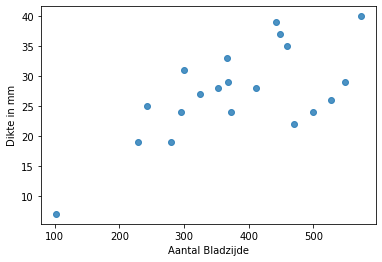

In [80]:
sns.regplot(x=df['Aantal Bladzijde'], y=df['Dikte in mm'], fit_reg=False)

<h1>2. Lineare Regressie</h1>

In [68]:
X = df['Aantal Bladzijde']
y = df['Dikte in mm']

In [82]:
xmean = np.mean(X)
ymean = np.mean(y)
print(xmean, ymean)

380.65 27.3


In [98]:
df['xycov'] = (df['Aantal Bladzijde'] - xmean) * (df['Dikte in mm'] - ymean)
df['xvar'] = (df['Aantal Bladzijde'] - xmean)**2
df.head(20)

,ID,Titel,Aantal Bladzijde,Dikte in mm,xycov,xvar
0,1,Werken met logistiek,470,22,-473.555,7983.4225
1,2,Dark Money,449,37,662.995,4671.7225
2,3,CRM in de Praktijk,295,24,282.645,7335.9225
3,4,Organisatie en Management,528,26,-191.555,21712.0225
4,5,1491,549,29,286.195,28341.7225
5,6,The shallows,280,19,835.395,10130.4225
6,7,Ready player one,372,24,28.545,74.8225
7,8,21 lessons in the 21th century,352,28,-20.055,820.8225
8,9,Aninal Farm,102,7,5656.595,77645.8225
9,10,Nineteen eighty-four,325,27,16.695,3096.9225


In [84]:
beta = df['xycov'].sum() / df['xvar'].sum()
print(beta)

0.042667708750888836


In [91]:
alpha = ymean - (beta * xmean)
print(alpha)

11.058536663974166


<h1>3. Teken de regressielijn</h1>

In [89]:
ypred = alpha + beta * X

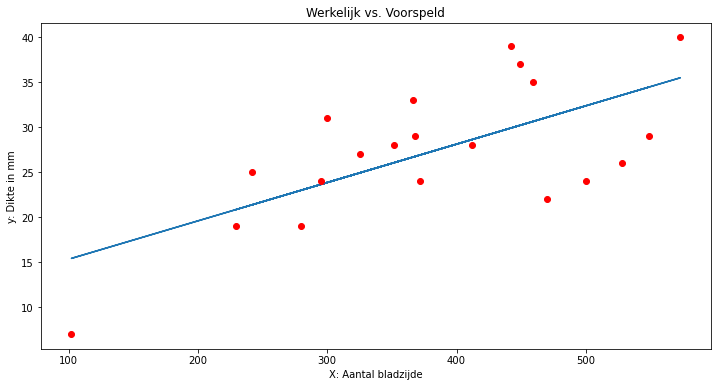

In [86]:
plt.figure(figsize=(12, 6))
plt.plot(X, ypred)     # regressie lijn
plt.plot(X, y, 'ro')   # scatter plot
plt.title('Werkelijk vs. Voorspeld')
plt.xlabel('X: Aantal bladzijde')
plt.ylabel('y: Dikte in mm')

plt.show()

<h1>4. Voer een voorspelling uit</h1>

In [95]:
alpha + beta * 100 # 100 staat voor 100 bladzijdes

15.32530753906305

In [97]:
alpha + beta * 2000 # 2000 staat voor 2000 bladzijdes

96.39395416575184

<h1>5. Geïnterpoleerde waarde vs Geëxtrapoleerde waarde</h1>

<b>Zowel 100 als 2000 zijn geëxtrapoleerde waardes</b><br>
<b>Hieronder een geïnterpoleerde waarde</b>

In [99]:
alpha + beta * 301 # 301 staat voor 301 bladzijdes

23.901516997991706